## MMIST 분류 ANN 모델

In [1]:
import tensorflow as tf
from keras import layers, models
from keras.models import Sequential
import numpy as np
from keras import datasets
from keras.utils import np_utils
import matplotlib.pyplot as plt
from omegaconf import OmegaConf

%matplotlib inline

In [2]:
def ANN_seq_func(Nin, Nh, Nout):
    """_summary_

    Args:
        Nin (_type_): input 
        Nh (_type_): hidden layer 
        Nout (_type_): output layers 

    Returns:
        _type_: classificaiton model
    """
    model = Sequential()
    model.add(layers.Dense(Nh, input_dim = (Nin, ), activation = 'relu'))
    model.add(layers.Dense(Nout, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [44]:
class ANN_seq_classification(Sequential):
    def __init__(self, input, hidden, output):
        super().__init__()
        self.add(layers.Dense(hidden, activation='relu', input_shape=(input, )))
        self.add(layers.Dropout(0.3))
        self.add(layers.Dense(output, activation='softmax'))
        self.compile(loss='categorical_crossentropy',optimizer='adam' ,metrics=['accuracy'])

In [5]:
def data_func():
    (X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
    
    Y_train = np_utils.to_categorical(y_train)
    Y_test = np_utils.to_categorical(y_test)
    
    Channel, Height, Width = X_train.shape
    X_train = X_train.reshape(-1, Width * Height)
    X_test = X_test.reshape(-1, Width * Height)
    
    X_train = X_train / 255.0
    X_test = X_test / 255.0
    
    return (X_train, Y_train), (X_test, Y_test)
    
    

In [6]:
def plot_loss(history, title=None):
    """_summary_

    Args:
        history (_type_): model history
        title (_type_, optional): title. Defaults to None.
    """
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'], loc=0)

In [35]:
def plot_acc(history, title=None):
    """_summary_

    Args:
        history (_type_): model history
        title (_type_, optional): title. Defaults to None.
    """
    if not isinstance(history, dict):
        history = history.history
    plt.plot(history['accuracy'])
    plt.plot(history['val_accuracy'])
    
    if title is not None:
        plt.title(title)
    
    plt.xlabel('Epoch')
    plt.ylabel('acc')
    plt.legend(['Training', 'Validation'], loc=0)

In [29]:
args = {
    "input_dim" : 784, # 28 * 28
    "hidden_dim" : 128,
    "output_dim" : 10,
    "epochs" : 20,
    "batch_size" : 64,
    "v_split" : 0.2
}

args = OmegaConf.create(args)

In [38]:

model = ANN_seq_classification(args.input_dim, args.hidden_dim, args.output_dim)
(X_train, Y_train), (X_test, Y_test)= data_func()

In [39]:
history = model.fit(X_train, Y_train, epochs=args.epochs, batch_size=args.batch_size, \
    validation_split=args.v_split)


Epoch 1/20
750/750 [==============================] - 2s 2ms/step - loss: 0.4063 - accuracy: 0.8817 - val_loss: 0.1878 - val_accuracy: 0.9467
Epoch 2/20
750/750 [==============================] - 1s 2ms/step - loss: 0.2055 - accuracy: 0.9401 - val_loss: 0.1365 - val_accuracy: 0.9609
Epoch 3/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1558 - accuracy: 0.9538 - val_loss: 0.1167 - val_accuracy: 0.9663
Epoch 4/20
750/750 [==============================] - 1s 2ms/step - loss: 0.1290 - accuracy: 0.9619 - val_loss: 0.1035 - val_accuracy: 0.9693
Epoch 5/20
750/750 [==============================] - 2s 2ms/step - loss: 0.1118 - accuracy: 0.9669 - val_loss: 0.0945 - val_accuracy: 0.9722
Epoch 6/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0994 - accuracy: 0.9698 - val_loss: 0.0899 - val_accuracy: 0.9741
Epoch 7/20
750/750 [==============================] - 1s 2ms/step - loss: 0.0865 - accuracy: 0.9740 - val_loss: 0.0877 - val_accuracy: 0.9746
Epoch 

In [40]:
performance_test = model.evaluate(X_test, Y_test, batch_size=args.batch_size)
print(f"Test loss and Accuracy : {performance_test}")

157/157 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9798
Test loss and Accuracy : [0.07387439906597137, 0.9797999858856201]


In [41]:
import os 
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

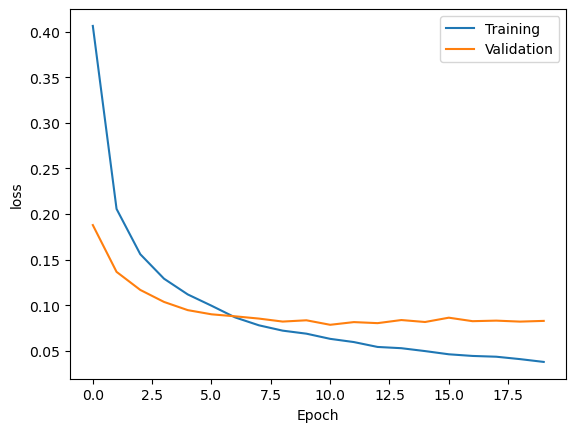

In [42]:
plot_loss(history)
plt.show()

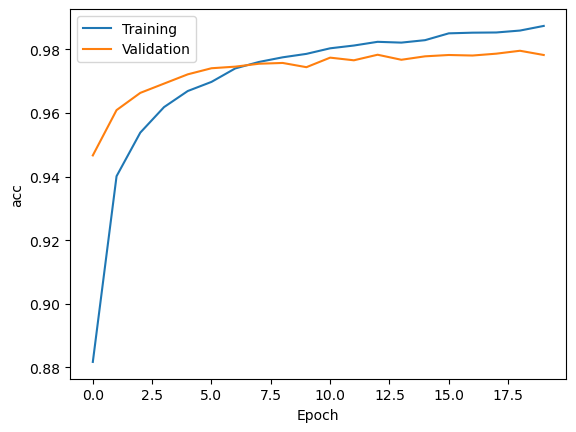

In [43]:
plot_acc(history)
plt.show()

## 보스턴 집값 예측(회귀) ANN 구현

In [15]:
from sklearn.preprocessing import MinMaxScaler
from kerasapp.keras import plot_loss

In [30]:
class ANN_seq_regression(Sequential):
    def __init__(self, input, hidden, output):
        super().__init__()
        self.add(layers.Dense(hidden, activation='relu', input_shape=(input, )))
        # self.add(layers.Dropout(0.3))
        self.add(layers.Dense(output))
        self.compile(loss='mse', optimizer='adam' ,metrics=['accuracy'])

In [16]:
def data_func_boston():
    (X_train, y_train), (X_test, y_test) = datasets.boston_housing.load_data()
    scaler = MinMaxScaler()  
    X_train = scaler.fit_transform(X_train)
    X_tese = scaler.fit_transform(X_test)
    return (X_train, y_train), (X_test, y_test)

In [31]:
args1 = {
    "input" : 13,
    "hidden" : 64,
    "output" : 1,
    "batch_size" : 32,
    "epochs" : 100,
    "v_split" : 0.3
}

In [32]:
args1 = OmegaConf.create(args1)

4/4 [==============================] - 0s 1ms/step - loss: 6883352.0000 - accuracy: 0.0000e+00

 Test Loss : 6883352.00


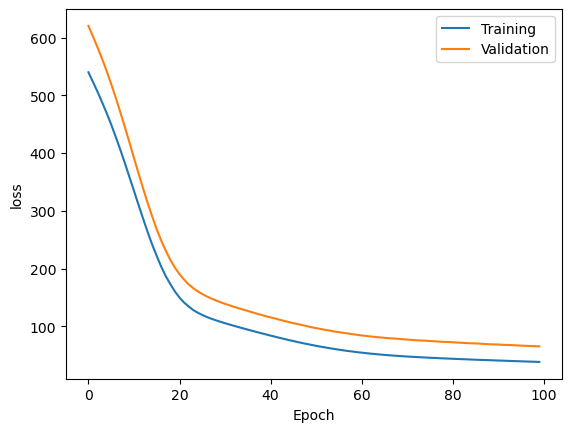

In [34]:
model1 = ANN_seq_regression(args1.input, args1.hidden, args1.output)
(X_train, y_train), (X_test, y_test) = data_func_boston()
history1 = model1.fit(X_train, y_train, epochs=args1.epochs, batch_size=args1.batch_size,\
                        validation_split=args1.v_split, verbose=0)
performance_test1 = model1.evaluate(X_test, y_test, batch_size=args1.batch_size)
print(f"\n Test Loss : {performance_test1[0]:.2f}")

plot_loss(history1)
plt.show()

회귀라서 Accuracy를 뽑아낼 수 없는것인가? 
 -> 회귀 문제는 정확한 답이 없기 때문에 맞춘 수/전체 에 대한 개념을 사용할 수 없음